 Input Data | Output Data |
| --- | --- |
| Region | Tokyo - city/ward, district/town/village |
| Price range (Korean standards) | Accurate price (price) |
| Room Type | Private room, Entire home/apt |
| Accommodates number of guests | Host-written accommodation description (neighborhood_overview) |
| Bathrooms (bathrooms_text) | Host identity verification (host_identity_verified) |
| Bedrooms (bedrooms) | Customer-written accommodation description (description) |
| Beds: number of beds | Minimum number of nights (minimum_nights) |
| Rating (review_scores_rating) range | Overall rating score (review_scores_rating), Number of reviews in the last 30 days (number_of_reviews_l30d), Date of the last review (last_review), Date calendar was last updated (calendar_updated) |

In [2]:
import pandas as pd
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class AirbnbInput:
    def __init__(self, user_id, review_scores_rating, neighbourhood_cleansed, room_type, accommodates, price,minimum_nights , bathrooms_text = None, bedrooms = None, beds = None):
        self.user_id = user_id
        self.review_scores_rating = review_scores_rating
        self.neighbourhood_cleansed = neighbourhood_cleansed
        self.room_type = room_type
        self.accommodates = accommodates
        self.price = price
        self.bathrooms_text = bathrooms_text
        self.bedrooms = bedrooms
        self.beds = beds
        self.minimum_nights = minimum_nights

    def __getitem__(self, key):
        # 인덱싱된 키에 따라 속성 값을 반환
        if key == 'user_id':
            return self.user_id
        elif key == 'listing_url':
            return self.listing_url
        elif key == 'description':
            return self.description
        elif key == 'review_scores_rating':
            return self.review_scores_rating
        elif key == 'neighbourhood_cleansed':
            return self.neighbourhood_cleansed
        elif key == 'room_type':
            return self.room_type
        elif key == 'accommodates':
            return self.accommodates
        elif key == 'bathrooms_text':
            return self.bathrooms_text
        elif key == 'bedrooms':
            return self.bedrooms
        elif key == 'beds':
            return self.beds
        elif key == 'price':
            return self.price
        elif key == 'minimum_nights':
            return self.minimum_nights
        else:
            raise KeyError(f"Invalid key: {key}")


    def __str__(self):
        return f"User ID: {self.user_id}, Review Scores Rating: {self.review_scores_rating}, Neighbourhood Cleansed: {self.neighbourhood_cleansed}, Room Type: {self.room_type}, Accommodates: {self.accommodates}, Price: {self.price}, Minimum Nights: {self.minimum_nights}"

# 총 리뷰개수
class AirbnbOutput:
    def __init__(self, user_id, host_id, listing_url, description, neighborhood_overview, picture_url, amenities, number_of_reviews_l30d, review_scores_rating, instant_bookable, neighbourhood_cleansed, room_type, accommodates, price, bathrooms_text, bedrooms, beds, minimum_nights):
        self.user_id = user_id
        self.host_id = host_id
        self.listing_url = listing_url
        self.description = description
        self.neighborhood_overview = neighborhood_overview
        self.picture_url = picture_url
        self.amenities = amenities
        self.number_of_reviews_l30d = number_of_reviews_l30d
        self.review_scores_rating = review_scores_rating
        self.instant_bookable = instant_bookable
        self.neighbourhood_cleansed = neighbourhood_cleansed
        self.room_type = room_type
        self.accommodates = accommodates
        self.price = price
        self.bathrooms_text = bathrooms_text
        self.bedrooms = bedrooms
        self.beds = beds
        self.minimum_nights = minimum_nights

    def __getitem__(self, key):
        # 인덱싱된 키에 따라 속성 값을 반환
        if key == 'user_id':
            return self.user_id
        elif key == 'host_id':
            return self.host_id
        elif key == 'listing_url':
            return self.listing_url
        elif key == 'description':
            return self.description
        elif key == 'neighbourhood_cleansed':
            return self.neighbourhood_cleansed
        elif key == 'room_type':
            return self.room_type
        elif key == 'accommodates':
            return self.accommodates
        elif key == 'price':
            return self.price
        elif key == 'bathrooms_text':
            return self.bathrooms_text
        elif key == 'bedrooms':
            return self.bedrooms
        elif key == 'beds':
            return self.beds
        elif key == 'minimum_nights':
            return self.minimum_nights
        else:
            raise KeyError(f"Invalid key: {key}")

class HostInfo:
    def __init__(self, host_id, host_url, host_name, host_about, host_thumbnail_url, host_picture_url, host_identity_verified):
        self.host_id =  host_id
        self.host_url =  host_url
        self.host_name =  host_name
        self.host_about =  host_about
        self.host_thumbnail_url =  host_thumbnail_url
        self.host_picture_url =  host_picture_url
        self.host_identity_verified =  host_identity_verified

    def __getitem__(self, key):
        # 인덱싱된 키에 따라 속성 값을 반환
        if key == 'host_id':
            return self.host_id
        elif key == 'host_url':
            return self.host_url
        elif key == 'host_name':
            return self.host_name
        elif key == 'host_about':
            return self.host_about
        elif key == 'host_thumbnail_url':
            return self.host_thumbnail_url
        elif key == 'host_picture_url':
            return self.host_picture_url
        elif key == 'host_identity_verified':
            return self.host_identity_verified
        else:
            raise KeyError(f"Invalid key: {key}")


In [ ]:
import csv
import gzip

class AirbnbRecommend:
    def __init__(self, data_file, input_data):
        self.data = []  # 데이터를 저장할 리스트
        self.load_data(data_file)  # 데이터 파일로부터 데이터 로드
        self.input_data = input_data
        self.output_data = []
        self.filter_data()  # 데이터 필터링 및 추천 알고리즘 수행

    def load_data(self, data_file):
        # Gzip 압축된 데이터 파일을 읽어서 데이터를 처리하는 로직 구현
        with gzip.open(data_file, 'rt') as file:
            csv_reader = csv.DictReader(file)  # Gzip 압축된 CSV 파일을 딕셔너리 형태로 읽음
            for row in csv_reader:
                self.data.append(row)


    def filter_data(self):
        for item in self.data:
            # 입력 데이터와 필터링 대상 데이터 간의 일치 여부 확인
            if self.is_match(item):
                airbnb_output = AirbnbOutput(
                    user_id=self.input_data['user_id'],
                    host_id=item['host_id'],
                    listing_url=item['listing_url'],
                    description=item['description'],
                    neighborhood_overview=item['neighborhood_overview'],
                    picture_url=item['picture_url'],
                    amenities=item['amenities'],
                    number_of_reviews_l30d=item['number_of_reviews_l30d'],
                    review_scores_rating=item['review_scores_rating'],
                    instant_bookable=item['instant_bookable'],
                    neighbourhood_cleansed=item['neighbourhood_cleansed'],
                    room_type=item['room_type'],
                    accommodates=item['accommodates'],
                    price=item['price'],
                    bathrooms_text=item['bathrooms_text'],
                    bedrooms=item['bedrooms'],
                    beds=item['beds'],
                    minimum_nights=item['minimum_nights']
                )
                self.output_data.append(airbnb_output)

    def is_match(self, item):
        # 입력 데이터와 필터링 대상 데이터 간의 일치 여부를 검사하는 함수
        if (
            # 필수컬럼
            item['review_scores_rating'] == self.input_data.review_scores_rating and
            item['neighbourhood_cleansed'] == self.input_data.neighbourhood_cleansed and
            item['room_type'] == self.input_data.room_type and
            item['accommodates'] == self.input_data.accommodates and
            item['price'] == self.input_data.price and
            item['minimum_nights'] == self.input_data.minimum_nights and
            # 선택컬럼
            (self.input_data.bathrooms_text is None or item['bathrooms_text'] == self.input_data.bathrooms_text) and
            (self.input_data.bedrooms is None or item['bedrooms'] == self.input_data.bedrooms) and
            (self.input_data.beds is None or item['beds'] == self.input_data.beds)
        ):
            return True
        else:
            print("Conditions that evaluated to False:")
            if item['review_scores_rating'] != self.input_data.review_scores_rating:
                print("review_scores_rating")
            if item['neighbourhood_cleansed'] != self.input_data.neighbourhood_cleansed:
                print("neighbourhood_cleansed")
            if item['room_type'] != self.input_data.room_type:
                print("room_type")
            if item['accommodates'] != self.input_data.accommodates:
                print("accommodates")
            if item['price'] != self.input_data.price:
                print("price")
            if item['minimum_nights'] != self.input_data.minimum_nights:
                print("minimum_nights")
            if self.input_data.bathrooms_text is not None and item['bathrooms_text'] != self.input_data.bathrooms_text:
                print("bathrooms_text")
            if self.input_data.bedrooms is not None and item['bedrooms'] != self.input_data.bedrooms:
                print("bedrooms")
            if self.input_data.beds is not None and item['beds'] != self.input_data.beds:
                print("beds")

        return False

    def get_recommend_airbnb(self):
        return self.output_data

    def __str__(self):
        return f"Recommend Airbnb List: {len(self.output_data)}"


In [ ]:
data_file = '../../Tokyo_Airbnb/data/listings.csv.gz'

airbnb_data = pd.read_csv(data_file, compression='gzip', header=0, sep=',', quotechar='"')
airbnb_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,197677,https://www.airbnb.com/rooms/197677,20230629055629,2023-06-29,city scrape,Rental unit in Sumida · ★4.78 · 1 bedroom · 2 ...,<b>The space</b><br />We are happy to welcome ...,NaN,https://a0.muscache.com/pictures/38437056/d27f...,964081,...,4.83,4.53,4.79,M130003350,f,1,1,0,0,1.21
1,776070,https://www.airbnb.com/rooms/776070,20230629055629,2023-06-29,city scrape,Home in Kita-ku · ★4.98 · 1 bedroom · 1 bed · ...,We have been in airbnb since 2011 and it has g...,We love Nishinippori because is nearer to Toky...,https://a0.muscache.com/pictures/efd9f039-dbd2...,801494,...,4.98,4.83,4.91,NaN,f,1,0,1,0,1.89
2,905944,https://www.airbnb.com/rooms/905944,20230629055629,2023-06-29,city scrape,Rental unit in Shibuya · ★4.76 · 2 bedrooms · ...,NEWLY RENOVATED property entirely for you & yo...,Hatagaya is a great neighborhood located 4 min...,https://a0.muscache.com/pictures/miso/Hosting-...,4847803,...,4.90,4.77,4.77,Hotels and Inns Business Act | 渋谷区保健所長 | 31渋健生...,t,5,5,0,0,1.49
3,1016831,https://www.airbnb.com/rooms/1016831,20230629055629,2023-06-29,city scrape,Home in Setagaya · ★4.94 · 1 bedroom · 2 beds ...,"Hi there, I am Wakana and I live with my two f...",The location is walkable distance to famous Sh...,https://a0.muscache.com/pictures/airflow/Hosti...,5596383,...,4.98,4.92,4.89,NaN,f,1,0,1,0,1.96
4,1196177,https://www.airbnb.com/rooms/1196177,20230629055629,2023-06-29,city scrape,Home in 足立区 · ★4.71 · 1 bedroom · 1.5 shared b...,Ｓtay with host.We can help your travel.<br />B...,There are shopping mall near Senjuohashi stati...,https://a0.muscache.com/pictures/72890882/05ec...,5686404,...,4.88,4.67,4.75,NaN,f,1,0,1,0,0.79


In [ ]:
input_data = AirbnbInput(
    user_id="12345",
    review_scores_rating=str(airbnb_data['review_scores_rating'][0]),
    neighbourhood_cleansed=str(airbnb_data['neighbourhood_cleansed'][0]),
    room_type=str(airbnb_data['room_type'][0]),
    accommodates=str(airbnb_data['accommodates'][0]),
    price=str(airbnb_data['price'][0]),
    bathrooms_text=str(airbnb_data['bathrooms_text'][0]),
    bedrooms=str(airbnb_data['bedrooms'][0]),
    beds=str(airbnb_data['beds'][0]),
    minimum_nights=str(airbnb_data['minimum_nights'][0])
)


# Airbnb 추천 객체 초기화
recommendation = AirbnbRecommend(data_file, input_data)

# Airbnb 추천 목록 가져오기
recommended_listings = recommendation.get_recommend_airbnb()

# 추천된 목록 출력
for listing in recommended_listings:
    print(f"Listing Description: {listing['description']}")
    print(f"Listing Price: {listing['price']}")
    print("------------------------------")

recommended_listings

Conditions that evaluated to False:
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
room_type
accommodates
price
bathrooms_text
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
accommodates
price
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
room_type
price
minimum_nights
bathrooms_text
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
room_type
accommodates
price
minimum_nights
bathrooms_text
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
accommodates
price
minimum_nights
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
room_type
accommodates
price
minimum_nights
bathrooms_text
bedrooms
beds
Conditions that evaluated to False:
review_scores_rating
neighbourhood_cleansed
accommodates
price
minimum_nights
bathrooms_t

[]

### User Class

In [ ]:
class User:
    def __init__(self, user_id, airbnb_id, review_scores_rating, bedrooms, beds, bathrooms, region = None, price = None, accommodates = None, minimum_nights = None, id = None, password = None):
        self.user_id = user_id
        self.id = id
        self.review_scores_rating = review_scores_rating
        self.bedrooms = bedrooms
        self.beds = beds
        self.bathrooms = bathrooms
        self.airbnb_id = airbnb_id
        self.password = password
        self.region = region
        self.price = price
        self.accommodates = accommodates
        self.minimum_nights = minimum_nights

        def __getitem__(self, key):
        # 인덱싱된 키에 따라 속성 값을 반환
            if key == 'user_id':
                return self.user_id
            elif key == 'id':
                return self.id
            elif key == 'password':
                return self.password
            elif key == 'region':
                return self.region
            elif key == 'price':
                return self.price
            elif key == 'accommodates':
                return self.accommodates
            elif key == 'minimum_nights':
                return self.minimum_nights
            else:
                raise KeyError(f"Invalid key: {key}")


    def __str__(self):
        return f"User user_id: {self.user_id}, id : {self.id}, password : {self.password}, region : {self.region}, price: {self.price}, accommodates: {self.accommodates}, minimum_nights : {self.minimum_nights}"

    def create_csv(self):
        pass

In [ ]:
# airbnb id 랜덤으로 200 개 추출
random_airbnb_id = random.sample(airbnb_data.index.tolist(), 100)

random_airbnb_id = random_airbnb_id * 5
random.shuffle(random_airbnb_id)
random_airbnb_id


[10779,
 6608,
 1554,
 5036,
 5707,
 5661,
 3757,
 2248,
 4019,
 5255,
 6862,
 6629,
 4119,
 2006,
 10885,
 8393,
 7464,
 10339,
 3474,
 10885,
 3552,
 10044,
 7381,
 8394,
 7696,
 9185,
 6323,
 7696,
 2810,
 11020,
 3474,
 848,
 7104,
 6428,
 4328,
 10119,
 7379,
 4824,
 6862,
 4269,
 9290,
 8454,
 3809,
 9050,
 5780,
 8716,
 2248,
 4119,
 6608,
 3809,
 3671,
 6858,
 7696,
 9158,
 1742,
 2181,
 2424,
 6323,
 2248,
 8393,
 7055,
 7464,
 9185,
 11020,
 10291,
 9055,
 2238,
 2810,
 10433,
 8415,
 2248,
 10133,
 8085,
 4486,
 4661,
 10819,
 2635,
 2006,
 2940,
 1192,
 6428,
 848,
 10543,
 5707,
 2006,
 4661,
 3614,
 5448,
 6323,
 4269,
 2424,
 9645,
 10291,
 3671,
 848,
 7104,
 8147,
 7876,
 3474,
 3474,
 3395,
 8012,
 10339,
 6629,
 4486,
 5017,
 3004,
 4216,
 8930,
 3395,
 4328,
 10339,
 1742,
 3004,
 7055,
 8012,
 2995,
 2238,
 3809,
 6862,
 4486,
 2403,
 9953,
 9050,
 9185,
 2149,
 8394,
 9055,
 3190,
 7381,
 8930,
 9158,
 1192,
 10819,
 4661,
 4119,
 1554,
 9711,
 8347,
 8012,
 8639,

In [ ]:
import random
random_sample = random.sample(airbnb_data.index.tolist(), 1000)
sample = airbnb_data.loc[random_sample, [ 'id', 'review_scores_rating', 'bedrooms', 'beds', 'bathrooms_text', 'neighbourhood_cleansed', 'price', 'accommodates', 'minimum_nights']]
sample.reset_index(drop=True, inplace=True)
sample


,id,review_scores_rating,bedrooms,beds,bathrooms_text,neighbourhood_cleansed,price,accommodates,minimum_nights
0,796207270014898959,4.85,2.0,2.0,2 baths,Shinjuku Ku,"$17,229.00",4,1
1,770528525326503793,5.00,1.0,2.0,1 bath,Sumida Ku,"$7,869.00",3,2
2,38913494,4.40,NaN,1.0,1 private bath,Shinjuku Ku,"$8,357.00",2,1
3,42546748,4.56,1.0,2.0,1 bath,Katsushika Ku,"$3,000.00",2,1
4,37690809,4.93,1.0,1.0,4 shared baths,Taito Ku,"$7,000.00",1,1
...,...,...,...,...,...,...,...,...,...
995,49164120,4.47,1.0,NaN,1 private bath,Minato Ku,"$11,071.00",2,1
996,722625441851417812,4.17,NaN,4.0,1 private bath,Meguro Ku,"$14,000.00",4,3
997,830757852349073368,4.83,NaN,2.0,2 shared baths,Kokubunji Shi,"$5,846.00",3,1
998,41328350,4.96,3.0,7.0,1 bath,Koto Ku,"$36,039.00",9,2


In [ ]:
import csv

user_list = []

for i in range(500):
    price = sample['price'][i].replace('$', '').replace(',', '')
    user = User(user_id = i, airbnb_id = random_airbnb_id[i], review_scores_rating = sample['review_scores_rating'][i], bedrooms = sample['bedrooms'][i], beds = sample['beds'][i], bathrooms = sample['bathrooms_text'][i],region = sample['neighbourhood_cleansed'][i], price = price, accommodates = sample['accommodates'][i], minimum_nights = sample['minimum_nights'][i])
    user_list.append(user)

# CSV 파일에 데이터 쓰기
csv_filename = 'user_db.csv'
with open(csv_filename, 'w', newline='') as csvfile:
    fieldnames = ['user_id', 'airbnb_id', 'review_scores_rating', 'bedrooms', 'beds', 'bathrooms','region', 'price', 'accommodates', 'minimum_nights']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # CSV 파일의 헤더 작성
    writer.writeheader()

    # 사용자 데이터를 CSV 파일에 작성
    for user in user_list:
        writer.writerow({
            'user_id' : user.user_id,
            'airbnb_id' : user.airbnb_id,
            'review_scores_rating' : user.review_scores_rating,
            'bedrooms' : user.bedrooms,
            'beds' : user.beds,
            'bathrooms' : user.bathrooms,
            'region': user.region,
            'price': user.price,
            'accommodates': user.accommodates,
            'minimum_nights': user.minimum_nights,
        })

print(f'사용자 데이터가 {csv_filename} 파일에 성공적으로 저장되었습니다.')

사용자 데이터가 user_db.csv 파일에 성공적으로 저장되었습니다.


In [ ]:
user_db = pd.read_csv('user_db.csv')
user_db

,user_id,airbnb_id,review_scores_rating,bedrooms,beds,bathrooms,region,price,accommodates,minimum_nights
0,0,4361,4.57,1.0,2.0,1 bath,Shinjuku Ku,16714.0,4,1
1,1,3406,NaN,1.0,1.0,1 bath,Toshima Ku,8411.0,2,1
2,2,6897,4.73,1.0,2.0,1 bath,Sumida Ku,10371.0,3,2
3,3,2305,4.82,NaN,4.0,1 private bath,Taito Ku,12900.0,6,2
4,4,6475,NaN,1.0,1.0,1 bath,Shinjuku Ku,8804.0,2,2
...,...,...,...,...,...,...,...,...,...,...
495,495,415,4.56,1.0,2.0,1 bath,Suginami Ku,10552.0,4,1
496,496,6331,4.79,1.0,1.0,1 bath,Shinjuku Ku,26143.0,3,1
497,497,4826,NaN,1.0,3.0,1 bath,Sumida Ku,20000.0,4,1
498,498,6398,4.93,1.0,2.0,1 private bath,Taito Ku,10000.0,2,1


### 유저 데이터 추출

In [ ]:
import pandas as pd

data_file = '../../Tokyo_Airbnb/data/listings.csv.gz'
airbnb_data = pd.read_csv(data_file, compression='gzip', header=0, sep=',', quotechar='"')
review_data = pd.read_csv('../../Tokyo_Airbnb/data/150000_review.csv', dtype={'column_name': 'int64'})

review_data.head()

c:\Users\User\anaconda3\envs\develop_env\lib\site-packages\IPython\core\interactiveshell.py:3526: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments,kr_comments
0,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1002142.0,2011-09-21,Couldnt get any betterThe apartment itself is ...,더할 나위 없이 아파트 자체가 훌륭하고 필요한 모든 것이 갖춰져 있습니다. 게다가 ...
1,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1031940.0,2011-10-14,The apartment is bigger than it looks in the p...,아파트는 사진에서 보이는 것보다 더 넓습니다. 커플에게 적합합니다. 깨끗하고 잘 관...
2,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1097040.0,2011-11-21,The appartement is perfect for a couple It is ...,아파트는 커플에게 적합합니다. 조금 작지만 정말 완벽한 가구가 그것을 보완합니다. ...
3,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1183674.0,2011-11-30,We had a terrific stay at Yoshimi and Mareks l...,요시미와 마렉의 사랑스러운 아파트에서 즐거운 시간을 보냈습니다. 모든 것이 새로 정...
4,197677,964081,Yoshimi & Marek,t,Sumida Ku,2.0,1.0,2.0,"$11,000.00",3.0,2011-09-21,2023-05-30,4.78,1538004.0,2012-01-09,We loved our stay at the Oshiage Holiday Apart...,우리는 오시아게 홀리데이 아파트에서의 숙박을 좋아했습니다. 아파트는 매우 좋았고 매...


In [ ]:
columns = ['id', 'bathrooms_text']
df = airbnb_data[columns]
merged_data = review_data.merge(df, left_on='listing_id', right_on='id', how='inner')
merged_data

,listing_id,host_id,host_name,host_is_superhost,neighbourhood_cleansed,accommodates,bedrooms,beds,price,minimum_nights,first_review,last_review,review_scores_rating,reviewer_id,date,comments,kr_comments,id,bathrooms_text
0,10459659,53118015.0,Hirotaka,t,Shibuya Ku,3.0,NaN,3.0,"$12,000.00",2.0,2016-02-27,2023-06-22,4.89,229151394.0,2023-02-05,Hirotakas Shibuya apartment is located extreme...,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,10459659,1 bath
1,10459659,53118015.0,Hirotaka,t,Shibuya Ku,3.0,NaN,3.0,"$12,000.00",2.0,2016-02-27,2023-06-22,4.89,202132931.0,2023-02-08,Great place to stay in Shibuya Right in the mi...,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,10459659,1 bath
2,10459659,53118015.0,Hirotaka,t,Shibuya Ku,3.0,NaN,3.0,"$12,000.00",2.0,2016-02-27,2023-06-22,4.89,207696728.0,2023-02-14,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,10459659,1 bath
3,10459659,53118015.0,Hirotaka,t,Shibuya Ku,3.0,NaN,3.0,"$12,000.00",2.0,2016-02-27,2023-06-22,4.89,494572862.0,2023-02-16,The location of the room is perfect Close walk...,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습...",10459659,1 bath
4,10459659,53118015.0,Hirotaka,t,Shibuya Ku,3.0,NaN,3.0,"$12,000.00",2.0,2016-02-27,2023-06-22,4.89,211853953.0,2023-02-23,地方寬敞地點十分方便樓下就有lowsonbrcheck out之後還可以存放行李下次還會入住謝謝,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...,10459659,1 bath
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84467,35398501,264883119,Koji,t,Setagaya Ku,8.0,3.0,4.0,"$33,571.00",2.0,2019-06-19,2023-06-05,4.91,8930318.0,2019-09-23,Kojis home is nice and cozy The apartment was ...,코지의 집은 멋지고 아늑합니다. 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의...,35398501,1 bath
84468,35398501,264883119,Koji,t,Setagaya Ku,8.0,3.0,4.0,"$33,571.00",2.0,2019-06-19,2023-06-05,4.91,244635561.0,2019-09-27,立地も建物も申し分ないお家ですbr周辺に食べ物屋さんもたくさんあって住みたくなるくらいです,입지도 건물도 괜찮은 집입니다 br 주변에 음식점도 많이 있어 살고 싶어질 정도입니다,35398501,1 bath
84469,35398501,264883119,Koji,t,Setagaya Ku,8.0,3.0,4.0,"$33,571.00",2.0,2019-06-19,2023-06-05,4.91,45200848.0,2019-09-30,Excellent location with easy access to metro H...,지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...,35398501,1 bath
84470,35398501,264883119,Koji,t,Setagaya Ku,8.0,3.0,4.0,"$33,571.00",2.0,2019-06-19,2023-06-05,4.91,37517725.0,2019-10-08,Highly recommend Kojis place Very well located...,Kojis 장소를 강력히 추천합니다. 위치가 매우 좋고 시설이 잘 갖춰져 있습니다....,35398501,1 bath


In [ ]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84472 entries, 0 to 84471
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   listing_id              84472 non-null  object 
 1   host_id                 84472 non-null  object 
 2   host_name               84472 non-null  object 
 3   host_is_superhost       76698 non-null  object 
 4   neighbourhood_cleansed  84472 non-null  object 
 5   accommodates            84472 non-null  float64
 6   bedrooms                72421 non-null  float64
 7   beds                    80214 non-null  float64
 8   price                   84472 non-null  object 
 9   minimum_nights          84472 non-null  float64
 10  first_review            84472 non-null  object 
 11  last_review             84472 non-null  object 
 12  review_scores_rating    84472 non-null  float64
 13  reviewer_id             84472 non-null  float64
 14  date                    84472 non-null

In [ ]:
merged_data.isnull().sum()

listing_id                    0
host_id                       0
host_name                     0
host_is_superhost          7774
neighbourhood_cleansed        0
accommodates                  0
bedrooms                  12051
beds                       4258
price                         0
minimum_nights                0
first_review                  0
last_review                   0
review_scores_rating          0
reviewer_id                   0
date                          0
comments                    176
kr_comments                 186
id                            0
bathrooms_text              187
dtype: int64

#### 데이터 전터리


- 개인 욕실 (Private Bathroom): "1 bath", "1 private bath", "1.5 baths", "2 baths", "1.5 baths", "3 baths", "2.5 baths", "3.5 baths", "4 baths", "5 baths", "4.5 baths", "8 baths", "10 baths", "11 baths"

- 공용 욕실 (Shared Bathroom): "1 shared bath", "2 shared baths", "3 shared baths", "4 shared baths", "7 shared baths", "5 shared baths", "6 shared baths", "5.5 shared baths", "4.5 shared baths", "6.5 baths", "7.5 baths", "8.5 baths", "5.5 baths"

- 반 욕실 (Half-Bath): "Shared half-bath", "Half-bath"

- .모든 컬럼의 nan 값은 Unknown

In [ ]:
columns = ['listing_id', 'host_id', 'reviewer_id', 'neighbourhood_cleansed', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'price', 'minimum_nights', 'kr_comments']
user_data = merged_data[columns]
user_data

,listing_id,host_id,reviewer_id,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,kr_comments
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,1 bath,NaN,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,1 bath,NaN,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,1 bath,NaN,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,1 bath,NaN,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습..."
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,1 bath,NaN,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...
...,...,...,...,...,...,...,...,...,...,...,...
84467,35398501,264883119,8930318.0,Setagaya Ku,8.0,1 bath,3.0,4.0,"$33,571.00",2.0,코지의 집은 멋지고 아늑합니다. 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의...
84468,35398501,264883119,244635561.0,Setagaya Ku,8.0,1 bath,3.0,4.0,"$33,571.00",2.0,입지도 건물도 괜찮은 집입니다 br 주변에 음식점도 많이 있어 살고 싶어질 정도입니다
84469,35398501,264883119,45200848.0,Setagaya Ku,8.0,1 bath,3.0,4.0,"$33,571.00",2.0,지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...
84470,35398501,264883119,37517725.0,Setagaya Ku,8.0,1 bath,3.0,4.0,"$33,571.00",2.0,Kojis 장소를 강력히 추천합니다. 위치가 매우 좋고 시설이 잘 갖춰져 있습니다....


In [ ]:
import re

def categorize_bathrooms(bathroom_text):
    if bathroom_text is None:
        return "Unknown"
    elif "private" in bathroom_text.lower():
        return "Private Bathroom"
    elif "shared" in bathroom_text.lower():
        return "Shared Bathroom"
    elif "half" in bathroom_text.lower():
        return "Half-Bath"
    else:
        # 숫자로 시작하는 경우 숫자로 추출
        matches = re.findall(r'\d+', bathroom_text)
        if matches:
            num_bathrooms = int(matches[0])
            if num_bathrooms <= 1:
                return "Private Bathroom"
            elif 1 < num_bathrooms <= 5:
                return "Private Bathroom"
            elif 5 < num_bathrooms <= 10:
                return "Private Bathroom"
            elif num_bathrooms > 10:
                return "Private Bathroom"
    return "Unknown"


In [ ]:
df_copy = user_data.copy()
df_copy['bathrooms_text'] = df_copy['bathrooms_text'].apply(lambda x: categorize_bathrooms(str(x)))
df_copy

,listing_id,host_id,reviewer_id,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,kr_comments
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,NaN,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,NaN,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,NaN,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,NaN,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습..."
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,NaN,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...
...,...,...,...,...,...,...,...,...,...,...,...
84467,35398501,264883119,8930318.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,코지의 집은 멋지고 아늑합니다. 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의...
84468,35398501,264883119,244635561.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,입지도 건물도 괜찮은 집입니다 br 주변에 음식점도 많이 있어 살고 싶어질 정도입니다
84469,35398501,264883119,45200848.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...
84470,35398501,264883119,37517725.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,Kojis 장소를 강력히 추천합니다. 위치가 매우 좋고 시설이 잘 갖춰져 있습니다....


In [ ]:
df_copy.isnull().sum()

listing_id                    0
host_id                       0
reviewer_id                   0
neighbourhood_cleansed        0
accommodates                  0
bathrooms_text                0
bedrooms                  12051
beds                       4258
price                         0
minimum_nights                0
kr_comments                 186
dtype: int64

In [ ]:
df_copy['bedrooms'].unique()

array([nan,  1.,  4.,  2.,  3.,  5.,  6.])

In [ ]:
df_copy['bedrooms'].fillna('Unknown', inplace=True)

In [ ]:
df_copy.isnull().sum()

listing_id                   0
host_id                      0
reviewer_id                  0
neighbourhood_cleansed       0
accommodates                 0
bathrooms_text               0
bedrooms                     0
beds                      4258
price                        0
minimum_nights               0
kr_comments                186
dtype: int64

In [ ]:
df_copy['beds'].unique()

array([ 3.,  1.,  2., nan,  8.,  4.,  7.,  5.,  6.,  9., 36., 10., 11.])

In [ ]:
df_copy['beds'].fillna('Unknown', inplace=True)
df_copy.isnull().sum()

listing_id                  0
host_id                     0
reviewer_id                 0
neighbourhood_cleansed      0
accommodates                0
bathrooms_text              0
bedrooms                    0
beds                        0
price                       0
minimum_nights              0
kr_comments               186
dtype: int64

### kr_comments 가 nan 값인 데이터 삭제

In [ ]:
df_copy.dropna(inplace=True)
df_copy.isnull().sum()

listing_id                0
host_id                   0
reviewer_id               0
neighbourhood_cleansed    0
accommodates              0
bathrooms_text            0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
kr_comments               0
dtype: int64

In [ ]:

# df_copy.rename(columns={
#     'listing_id': 'airbnb_id',
#     'reviewer_name': 'user',
#     'neighbourhood_cleansed': 'region',
#     'bathrooms_text': 'bathrooms',
#     'kr_comments' : 'comments'
# }, inplace=True)

df_copy.to_csv('user_data.csv')

df_copy


,listing_id,host_id,reviewer_id,neighbourhood_cleansed,accommodates,bathrooms_text,bedrooms,beds,price,minimum_nights,kr_comments
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습..."
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...
...,...,...,...,...,...,...,...,...,...,...,...
84467,35398501,264883119,8930318.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,코지의 집은 멋지고 아늑합니다. 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의...
84468,35398501,264883119,244635561.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,입지도 건물도 괜찮은 집입니다 br 주변에 음식점도 많이 있어 살고 싶어질 정도입니다
84469,35398501,264883119,45200848.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...
84470,35398501,264883119,37517725.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,Kojis 장소를 강력히 추천합니다. 위치가 매우 좋고 시설이 잘 갖춰져 있습니다....


In [ ]:
user_data = pd.read_csv('/content/drive/MyDrive/Google Colab/Airbnb_Project/Pipeline/yunyoung/user_data.csv')

In [ ]:
user_data['reviewer_id'].value_counts().iloc[:10]

122183286.0    24
157424616.0    19
154890401.0    19
129868068.0    18
34592825.0     18
20245095.0     14
128162617.0    14
320649161.0    14
29248009.0     14
79987220.0     13
Name: reviewer_id, dtype: int64

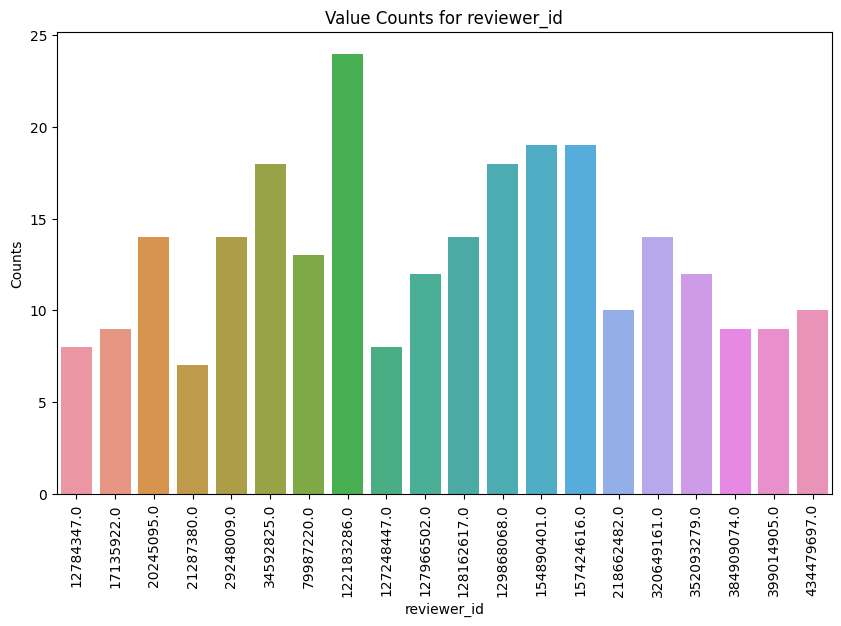

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임의 범주형 열에 대한 빈도 계산
value_counts = user_data['reviewer_id'].value_counts().iloc[:20]
sorted(value_counts)
# Seaborn 색상 맵 사용
sns.set_palette("pastel")

# 막대 그래프로 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title('Value Counts for reviewer_id')
plt.xlabel('reviewer_id')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

## 고객 리뷰 감정분석

In [ ]:
!pip install -q -U sentence-transformers

In [ ]:
!pip install transformers

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re


In [5]:
user_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Project/Airbnb_Project/Pipeline/yunyoung/user_data.csv', index_col = 0)
user_data.rename(columns={
    'listing_id': 'airbnb_id',
    'reviewer_name': 'user',
    'neighbourhood_cleansed': 'region',
    'bathrooms_text': 'bathrooms',
    'kr_comments' : 'comments'
}, inplace=True)

user_data.reset_index(drop=True, inplace=True)
user_data


,airbnb_id,host_id,reviewer_id,region,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,comments
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습..."
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...
...,...,...,...,...,...,...,...,...,...,...,...
84281,35398501,264883119.0,8930318.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,코지의 집은 멋지고 아늑합니다. 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의...
84282,35398501,264883119.0,244635561.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,입지도 건물도 괜찮은 집입니다 br 주변에 음식점도 많이 있어 살고 싶어질 정도입니다
84283,35398501,264883119.0,45200848.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...
84284,35398501,264883119.0,37517725.0,Setagaya Ku,8.0,Private Bathroom,3.0,4.0,"$33,571.00",2.0,Kojis 장소를 강력히 추천합니다. 위치가 매우 좋고 시설이 잘 갖춰져 있습니다....


In [6]:
def preprocess_and_tokenize(text):
    # 한국어 텍스트만 남기고 나머지는 공백으로 대체
    text = re.sub(r'[^가-힣 ]', ' ', text)
    # 작은따옴표(') 제거
    text = text.replace("'", '')
    # 연속된 공백을 하나의 공백으로 대체하고 양쪽 공백 제거
    text = ' '.join(text.split())

    return text

In [7]:
user_data['preprocessing_comments'] = user_data['comments'].apply(preprocess_and_tokenize)
user_data['preprocessing_comments']

0        히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...
1        시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...
2         아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다
3        방의 위치는 완벽합니다 모든 것 특히 기차역까지 도보로 갈 수 있는 거리에 있습니다...
4        숙소가 넓고 위치가 매우 편리합니다 아래층에 체크아웃 후 짐을 보관할 수 있는 이 ...
                               ...                        
84281    코지의 집은 멋지고 아늑합니다 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의시...
84282         입지도 건물도 괜찮은 집입니다 주변에 음식점도 많이 있어 살고 싶어질 정도입니다
84283    지하철에 쉽게 접근할 수 있는 훌륭한 위치 집은 반짝반짝 깨끗하며 목록에 설명된 대...
84284    장소를 강력히 추천합니다 위치가 매우 좋고 시설이 잘 갖춰져 있습니다 상점과 지하철...
84285    놀라울 정도로 친절하고 수용적인 동네인 에 가까이 접근할 수 있는 뛰어난 위치와 숙...
Name: preprocessing_comments, Length: 84286, dtype: object

In [8]:
review_lengths = [len(review) for review in user_data['preprocessing_comments']]

max_review_length = max(review_lengths)
average_token_length = sum(review_lengths) / len(review_lengths)

print("가장 긴 문장 길이:", max_review_length)
print("평균 문장 길이:", average_token_length)


가장 긴 문장 길이: 3150
평균 문장 길이: 97.65884013952495


###  Kiwi 패키지
https://github.com/bab2min/kiwipiepy

In [9]:
!pip install --upgrade pip
!pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for kiwipiepy from https://files.pythonhosted.org/packages/25/5d/82183e637decaa02ec70e502aef95f4e87ea4f2a77b7e7e30a57318052a9/kiwipiepy-0.16.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.3 MB/s eta 0:00:00
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=7689f60c4f0d2d610584bc58ca9804d73a990e15e9d4a5000aa8191ee2f4476e
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model


In [14]:
#감성어 사전 불러오기
!git clone https://github.com/park1200656/KnuSentiLex.git
f = pd.read_csv('/content/KnuSentiLex/SentiWord_Dict.txt','\t')
f.to_csv('SentiWord_to_csv.csv')

sentiment_dictionary = pd.read_csv('SentiWord_to_csv.csv', header=0, names=[ 'Emoticon', 'Sentiment_Score'])
sentiment_dict = dict(zip(sentiment_dictionary['Emoticon'], sentiment_dictionary['Sentiment_Score']))

#### 'NNG', 'NNP', 'VV', 'VA' 태그 분리

In [15]:
from kiwipiepy import Kiwi

kiwi = Kiwi(model_type='sbg', typos='basic')


In [16]:
def noun_extractor(text):
    results = []
    result = kiwi.analyze(text)
    for token, pos, _, _ in result[0][0]:
        if len(token) != 1 :
          if pos.startswith('N'):
            results.append(token)
          elif pos.startswith('V'):
            results.append(token + '다')

    nouns = ' '.join(results)

    return nouns

In [17]:
user_data['noun'] = user_data['preprocessing_comments'].apply(noun_extractor)
user_data.head()

,airbnb_id,host_id,reviewer_id,region,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,comments,preprocessing_comments,noun
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트 시부야 중심부 가깝다 때문 밤문화 레스토랑 접근 편리 이자...
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야 머물다 숙소 가운데 히로 근처 도움 필요 도와주다 객실 라벨 지정 편의 시설...
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,만족 위치 시설 무엇 욕실
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습...",방의 위치는 완벽합니다 모든 것 특히 기차역까지 도보로 갈 수 있는 거리에 있습니다...,위치 완벽 기차역 도보 거리 기차역 방법 대하다 지침 도착 들어가다 적극 추천 숙박 감사
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...,숙소가 넓고 위치가 매우 편리합니다 아래층에 체크아웃 후 짐을 보관할 수 있는 이 ...,숙소 위치 편리 아래층 체크 아웃 보관 다음 감사


In [18]:
# from PyKomoran import *
# import re
# komoran= Komoran(DEFAULT_MODEL['LIGHT'])


# def noun_tag(df, col):
#   noun_list= []
#   tag = ['NNG', 'NNP', 'VV', 'VA']
#   for index, row in df.iterrows():
#     nouns = komoran.get_morphes_by_tags(row[col], tag_list=tag)
#     nouns = ' '.join(nouns)
#     df.loc[index, 'noun'] = nouns


# # noun_tag(user_data, 'preprocessing_comments')

# def lemmatize(sentence):
#   # Py4JJavaError: An error occurred while calling o337145.getTokenList : java.lang.NullPointerException
#     if sentence is None or sentence == '':
#         return []

#     morphtags = komoran.pos(sentence)
#     words = []
#     for m, t in enumerate(morphtags):
#         k = t.get_pos()
#         if k in ['NNP', 'NNG']:
#             words.append(t.get_morph())
#         elif k in ['VA', 'VV']:
#             words.append(t.get_morph() + '다')
#     return words


# def process_dataframe(df, col):
#     w_ = []
#     for i, row in df.iterrows():
#         words = lemmatize(row[col])
#         w_.append(' '.join(words))
#     df['words'] = w_
#     df = df[df['words'] != ' ']
#     return df

# process_dataframe(user_data, 'preprocessing_comments')


In [19]:
# IOPub data rate exceeded.
# The notebook server will temporarily stop sending output
# to the client in order to avoid crashing it.
# To change this limit, set the config variable
# `--NotebookApp.iopub_data_rate_limit`.

# Current values:
# NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
# NotebookApp.rate_limit_window=3.0 (secs)

!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/local/etc/jupyter/jupyter_notebook_config.d/panel-client-jupyter.json
    	/usr/local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/usr/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.local/etc/jupyter/jupyter_notebook_config.json
|DEBUG|Paths used for configuration of jupyter_notebook_config: 
    	/root/.jupyter/jupyter_notebook_config.json

  _   _          _      _
 | | | |_ __  __| |__ _| |_ ___
 | |_| | '_ \/ _` / _` |  _/ -_)
  \___/| .__/\__,_\__,_|\__\___|
       |_|
                       
Read the migration plan to Notebook 7 to learn about the new features and the actions to take if you are using extensions.

https://jupyter-notebook.readthedocs.io/en/lates

### 감성분석


In [21]:

def calculate_sent_score(words, sentiment_dictionary):
    total = []
    for idx, w in enumerate(words):
        sent_score = 0
        w = w.split(' ')
        for j in w:
            if len(j) <= 1:
                continue
            elif j in sentiment_dictionary:
                sent_score += float(sentiment_dictionary[j])
        if len(w) > 0:
            total.append(sent_score / len(w))
        else:
            total.append(0.0)
    return total

def process_sentiment_data(df, output_csv, sentiment_dictionary):
  #'words' 열에 대한 감정 점수 계산
  df['sent_score'] = calculate_sent_score(df['noun'], sentiment_dictionary)
  sentiment_df = df[df['sent_score']!=0.0]
  sentiment_df.reset_index(drop = True, inplace = True)
  sentiment_df.to_csv(output_csv, index=False)



output_csv = 'sentiment_data.csv'
file_path = '/content/SentiWord_to_csv.csv'

process_sentiment_data(user_data, output_csv, sentiment_dict)


In [4]:
sentiment_df = pd.read_csv('/content/sentiment_data.csv')
sentiment_df[['preprocessing_comments', 'sent_score']]

,preprocessing_comments,sent_score
0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,0.114286
1,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,0.173913
2,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,0.400000
3,방의 위치는 완벽합니다 모든 것 특히 기차역까지 도보로 갈 수 있는 거리에 있습니다...,0.200000
4,숙소가 넓고 위치가 매우 편리합니다 아래층에 체크아웃 후 짐을 보관할 수 있는 이 ...,0.444444
...,...,...
62086,이 동네가 정말 마음에 듭니다 매우 편리하고 맛있는 음식 등을 탐색하기 쉽습니다 코...,0.428571
62087,코지의 집은 멋지고 아늑합니다 아파트는 매우 깨끗하고 훌륭하게 마무리되었으며 편의시...,0.222222
62088,입지도 건물도 괜찮은 집입니다 주변에 음식점도 많이 있어 살고 싶어질 정도입니다,0.166667
62089,장소를 강력히 추천합니다 위치가 매우 좋고 시설이 잘 갖춰져 있습니다 상점과 지하철...,0.105263


In [25]:
import plotly.graph_objects as go

# 점수에 따라 색상 설정
color_scale = ['#ff0000', '#ff6600', '#ffcc00', '#ccff00', '#66ff00', '#00ff00']

# 감정 점수 범위 설정
score_ranges = [-1, -0.5, 0, 0.5, 1, 1.5]

# 히스토그램 생성
fig = go.Figure()
top_comment = []
top_score = []

for i in range(len(score_ranges) - 1):
    score_range = (score_ranges[i], score_ranges[i+1])
    filtered_data = sentiment_df[(sentiment_df['sent_score'] >= score_range[0]) & (sentiment_df['sent_score'] < score_range[1])]

    top_comment.append(filtered_data['preprocessing_comments'][:10].values)
    top_score.append(filtered_data['sent_score'][:10].values)


        # 상위 10개 문장 추출
top_10_sentences = pd.DataFrame({
    'top_comment' : top_comment,
    'top_score' : top_score
})

fig.add_trace(go.Histogram(
    x=top_10_sentences['top_score'],
    marker_color=color_scale[i],
    opacity=0.75,
    name=f'Score {score_range[0]} - {score_range[1]}',
    hoverinfo='text',
    text=top_10_sentences['top_comment']  # 클릭 시 원본 문장을 텍스트로 표시
))

# 레이아웃 설정
fig.update_layout(
    title='Distribution of Sentiment Scores by Color',
    xaxis_title='Sentiment Score',
    yaxis_title='Frequency',
    bargap=0.05,
    legend=dict(title='Score Range')
)

# 클릭 이벤트 설정
fig.update_traces(
    customdata=top_10_sentences['top_comment'],
    hovertemplate='%{customdata}'
)

# 시각화 출력
fig.show()

### 감성 점수 시각화
정확도나 높지않아 보인다


In [39]:
import plotly.graph_objects as go
import pandas as pd

def visualize_sentiment_scatter(df, score_column, text_column, score_ranges, color_scale, isScatter = True,  top_range=10):
    fig = go.Figure()

    for i in range(len(score_ranges) - 1):
        score_range = (score_ranges[i], score_ranges[i+1])
        filtered_data = df[(df[score_column] >= score_range[0]) & (df[score_column] < score_range[1])]

        # 상위 10개 문장 추출
        top_comments = filtered_data[text_column][:top_range].values
        top_scores = filtered_data[score_column][:top_range].values

        # 클릭 이벤트 설정
        customdata = [f'Sentiment Score: {score}, Comment: {comment}' for score, comment in zip(top_scores, top_comments)]

        if isScatter:
          fig.add_trace(go.Scatter(
              x=top_scores,
              mode='markers',
              marker=dict(
                  color=color_scale[i],
                  size=10,
              ),
              name=f'Score {score_range[0]} - {score_range[1]}',
              hoverinfo='text',
              text=top_comments,  # 클릭 시 원본 문장을 텍스트로 표시
              customdata=customdata
          ))
        else:
          fig.add_trace(go.Bar(
          x=top_scores,
          marker_color=color_scale[i],
          name=f'Score {score_range[0]} - {score_range[1]}',
          hoverinfo='text',
          text=top_comments,  # 클릭 시 원본 문장을 텍스트로 표시
          customdata=customdata
    ))

    if isScatter:
      # 레이아웃 설정
      fig.update_layout(
          title='Top 10 Sentences in Each Sentiment Score Range',
          xaxis_title='Sentiment Score',
          yaxis_title='Frequency'
      )
    else:
      fig.update_layout(
          title='Top 10 Sentences in Each Sentiment Score Range',
          xaxis_title='Sentiment Score',
          yaxis_title='Frequency',
          barmode='group'
      )

    # 클릭 이벤트 설정
    fig.update_traces(
        hovertemplate='%{text}<br>%{customdata}'
    )

    # 시각화 출력
    fig.show()




In [40]:
sentiment_df = pd.read_csv('sentiment_data.csv')
score_ranges = [-1, -0.5, 0, 0.5, 1, 1.5]
color_scale = ['#ff0000', '#ff6600', '#ffcc00', '#ccff00', '#66ff00', '#00ff00']

visualize_sentiment_scatter(sentiment_df, 'sent_score', 'preprocessing_comments', score_ranges, color_scale, isScatter = False,  top_range=10)


In [41]:
visualize_sentiment_scatter(sentiment_df, 'sent_score', 'preprocessing_comments', score_ranges, color_scale, isScatter = True,  top_range=20)


## 클러스터링

In [17]:
sentiment_df['token'] = sentiment_df['noun'].apply(str.split)
sentiment_df.head()

,airbnb_id,host_id,reviewer_id,region,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,comments,preprocessing_comments,noun,sent_score,token
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트 시부야 중심부 가깝다 때문 밤문화 레스토랑 접근 편리 이자...,0.114286,"[히로타카스, 시부야, 아파트, 시부야, 중심부, 가깝다, 때문, 밤문화, 레스토랑..."
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야 머물다 숙소 가운데 히로 근처 도움 필요 도와주다 객실 라벨 지정 편의 시설...,0.173913,"[시부야, 머물다, 숙소, 가운데, 히로, 근처, 도움, 필요, 도와주다, 객실, ..."
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,만족 위치 시설 무엇 욕실,0.400000,"[만족, 위치, 시설, 무엇, 욕실]"
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습...",방의 위치는 완벽합니다 모든 것 특히 기차역까지 도보로 갈 수 있는 거리에 있습니다...,위치 완벽 기차역 도보 거리 기차역 방법 대하다 지침 도착 들어가다 적극 추천 숙박 감사,0.200000,"[위치, 완벽, 기차역, 도보, 거리, 기차역, 방법, 대하다, 지침, 도착, 들어..."
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...,숙소가 넓고 위치가 매우 편리합니다 아래층에 체크아웃 후 짐을 보관할 수 있는 이 ...,숙소 위치 편리 아래층 체크 아웃 보관 다음 감사,0.444444,"[숙소, 위치, 편리, 아래층, 체크, 아웃, 보관, 다음, 감사]"


### K-Means


In [115]:
sample_df = sentiment_df[:10000]

In [55]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

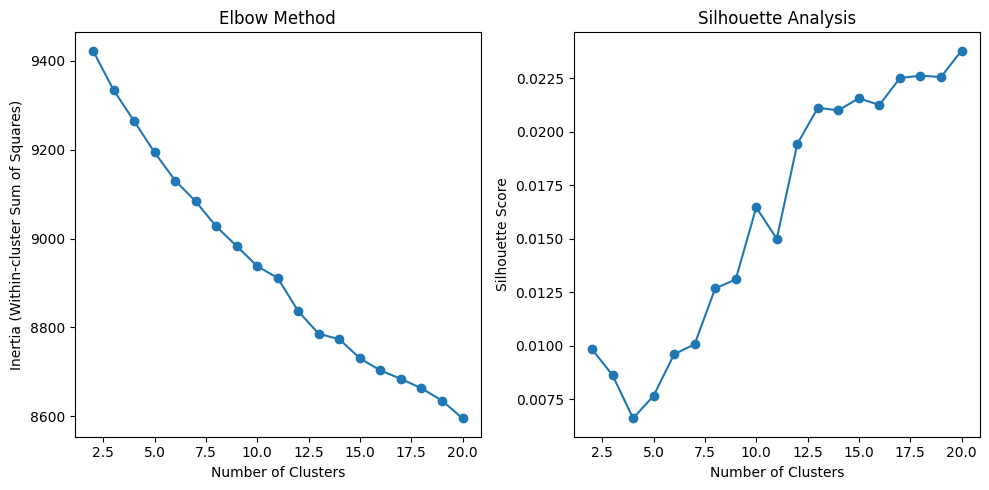

Optimal Cluster Count: 2


In [64]:


def find_optimal_cluster_count(data, max_clusters=20, max_features=1000, stop_words=None):
    """
    클러스터 개수를 판단하는 함수

    Parameters:
    - data: 텍스트 데이터가 포함된 DataFrame 또는 Series
    - max_clusters: 최대 클러스터 개수 (default: 10)
    - max_features: TF-IDF 벡터화 시 최대 단어 개수 (default: 1000)
    - stop_words: 불용어 리스트 (default: None)

    Returns:
    - 선택된 적절한 클러스터 개수
    """

    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words=stop_words)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data)

    # 클러스터 개수 범위 설정 (2부터 max_clusters까지)
    min_clusters = 2

    # 엘보우 메서드를 사용하여 적절한 클러스터 개수 판단
    inertia_values = []
    silhouette_scores = []

    for num_clusters in range(min_clusters, max_clusters + 1):
        kmeans = KMeans(n_clusters=num_clusters)
        kmeans.fit(tfidf_matrix)
        inertia_values.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(tfidf_matrix, kmeans.labels_))

    # 엘보우 메서드 그래프 그리기
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(min_clusters, max_clusters + 1), inertia_values, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title('Elbow Method')

    # 실루엣 분석 그래프 그리기
    plt.subplot(1, 2, 2)
    plt.plot(range(min_clusters, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')

    plt.tight_layout()
    plt.show()

    # 엘보우 메서드 기반으로 선택한 클러스터 개수 반환
    optimal_cluster_count = np.argmin(np.diff(inertia_values)) + min_clusters

    return optimal_cluster_count


optimal_count = find_optimal_cluster_count(sample_df['noun'])
print(f"Optimal Cluster Count: {optimal_count}")


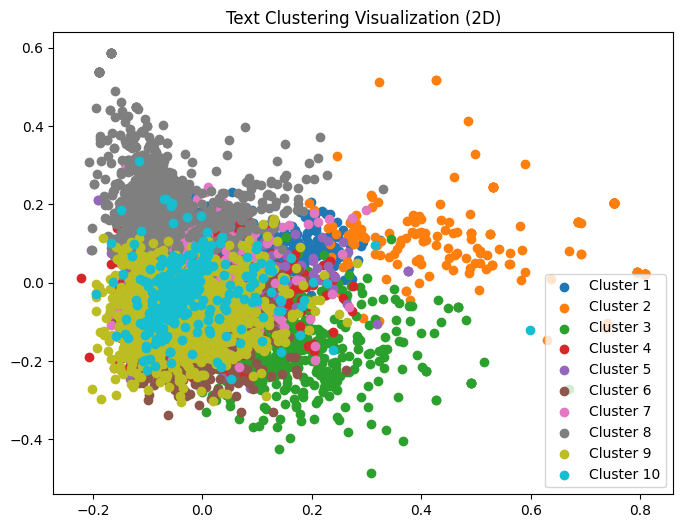

Cluster 1 Samples:
1. 방이 지하철역과 매우 가깝습니다 방이 매우 깨끗합니다 훌륭합니다 매우 마음에 듭니다
2. 갑자기 묵는 곳이 취소되어 버려 갑자기 묵어 주시는 형태가되었습니다 당일의 일로 체크인도 직전이었기 때문에 초조하고 있었습니다 씨는 회신이 매우 빨리 또 정중하게 대응해 주셨습니다 방은 매우 깨끗하고 목욕도 청결감이있었습니다 옷걸이와 수건 등의 일용품도 갖추고있어 매우 만족합니다 또한 테이블 위에 과자가 곁들여 있거나 페트병의 물 등도 준비하고있었습니다 어쨌든 매우 만족 그리고 갑자기 대응해 주셔서 대단히 도움이되었습니다 감사합니다 기회가 있으면 묵고 싶은 방입니다
3. 정말 만족스러운 곳이였어요 호스트 응대가 빠른 호스트뿐만 아니라 주택가에 위치해서 조용해요 일본의 주택가 분위기도 느낄 수 있어서 좋았어요 푹신한 침구도 좋았고 웬만한 것들 다 있어서 좋았어요 더 좋았던건 신주쿠랑 가까워서 시내구경 가는게 진짜 편했어요 다음에 오면 또 여기서 묵을 예정입니다 정말 만족스러웠어요
4. 좋아요 깨끗하고 넓고 편안해요 정말 좋아요 음식 구경에 대한 훌륭한 추천 매우 자세한 정보 제공됨 다음 여행에 다시 예약할 예정입니다
5. 방에서 신주쿠의 빌딩 거리나 도쿄도청을 볼 수 있어 훌륭한 위치였습니다 방 중은 외국인용으로 영어로 표기되고 있는 것이 많습니다만 알기 쉬운 영어로 쓰여져 있으므로 일본인에서도 안심하고 이용 할 수 있다고 생각합니다

Cluster 2 Samples:
1. 훌륭하고 편안한 숙박 좋은 위치
2. 방도 깨끗하고 편안하게 보낼 수있었습니다 액세스도 매우 좋았습니다
3. 깨끗하고 편안했고 정중하게 대응해 주셔서 감사합니다
4. 매우 깨끗하고 편안하게 보낼 수있었습니다 또한 부디 이용하고 싶습니다
5. 매우 편안하고 깨끗한 집

Cluster 3 Samples:
1. 이 에어비앤비에서 즐거운 시간을 보냈습니다 숙소는 깨끗했고 메인 룸과 침실 모두에 에어컨이 있었습니다 숙소는 찾기 쉬웠으며 게스트는 도착하기 전에 체크인 세부 정

In [105]:
def text_clustering(data, row, num_clusters=5, max_features=1000):
    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words=None)
    tfidf_matrix = tfidf_vectorizer.fit_transform(data[row])

    # K-Means 클러스터링
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf_matrix)
    data['cluster'] = kmeans.labels_

    # 클러스터별로 몇 개의 샘플을 출력
    cluster_samples = []
    for cluster_num in range(num_clusters):
        cluster_samples.append(data[data['cluster'] == cluster_num]['preprocessing_comments'].sample(5))

    # 클러스터 시각화 (2D)
    reduced_data = np.array(tfidf_matrix.todense())  # 차원 축소를 위해 밀집 형식으로 변환
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(reduced_data)

    plt.figure(figsize=(8, 6))
    # colors = ['b', 'g', 'r', 'c', 'm']  # 클러스터링 결과에 따른 색상
    num_colors = num_clusters
    cmap = plt.get_cmap('tab10', num_colors)

    # 컬러 추출
    colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
    for i in range(num_clusters):
        plt.scatter(reduced_data[data['cluster'] == i, 0], reduced_data[data['cluster'] == i, 1], c=colors[i], label=f'Cluster {i + 1}')

    plt.title('Text Clustering Visualization (2D)')
    plt.legend()
    plt.show()

    return cluster_samples



# 클러스터링 함수 호출
cluster_samples = text_clustering(sample_df,'noun', num_clusters=10, max_features=1000)

# 클러스터별 샘플 출력
for cluster_num, samples in enumerate(cluster_samples):
    print(f"Cluster {cluster_num + 1} Samples:")
    for idx, sample in enumerate(samples):
        print(f"{idx + 1}. {sample}")
    print()


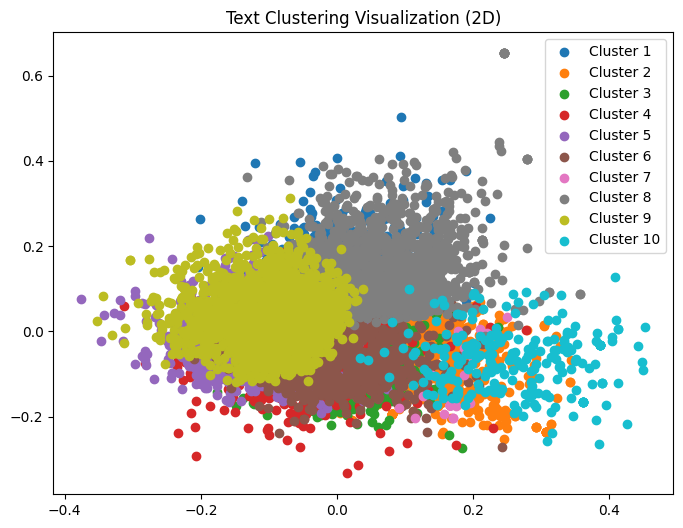

Cluster 1 Samples:
1. 정말 놀라운 호스트 훌륭한 공간 매우 깨끗하고 기차를 통해 도쿄의 거의 모든 곳과 가깝습니다 매우 반응이 좋습니다 뉴질랜드 출신의 영어가 유창하여 환영받는 도움이었습니다 몇 가지 특별한 요청에 도움을 주었습니다 매우 친절하고 따뜻했습니다
2. 집 위치가 좋습니다 교통이 매우 편리합니다 집주인의 답변이 매우 시기적절합니다 그러나 체크인 절차가 복잡합니다 가격은 도쿄에서 매우 저렴합니다
3. 집이 매우 깨끗합니다 집주인이 우리가 가족인줄 알고 미리 트윈베드를 함께 옮겨 주었습니다 매우 편리했습니다 위치가 매우 좋습니다 북쪽으로는 일본 행정구역인 황실까지 갈 수 있습니다 서쪽은 긴자 동쪽은 긴자 도보로 매우 가깝습니다
4. 는 매우 좋습니다 방은 매우 깨끗하고 편리하며 아름답습니다 근처에 음식이 많습니다 처음으로 에어비앤비를 선택한 덕분에 정말 좋은 경험을 했습니다 또한 우리가 좋은 손님이 되기를 바랍니다
5. 숙소는 전체적으로 매우 좋습니다 호스트가 해야 할 일 중 하나는 샤워실이 개 이상이라는 것입니다 인원이 많으면 샤워실이 개만 있으면 매우 불편합니다

Cluster 2 Samples:
1. 우리 명은 이 아파트에 편안하게 머물렀습니다 호스트는 우리가 도착하기 전에 아파트에 들어가는 방법에 대해 자세한 정보를 제공했습니다 아파트는 전망이 좋고 조용한 거리에 위치해 있어 상점에 가기 편리하며 방문객에게 간식과 음료 우산까지 제공했습니다 우리는 에어비앤비를 이용해 일본의 여러 도시에 머물렀는데 이 아파트가 최고입니다 가장 깨끗하고 최신이며 가장 편안합니다 누구에게나 추천하고 싶습니다
2. 명이 출장으로 방문하게 되었는데 모두가 마음에 들어했던 숙소였습니다 신주쿠 교엔마에 역에서 가까웠던 점이 가장 좋았습니다 조용하고 깨끗했으며 체크인 방식도 편했습니다 조금 아쉬웠던 점이 있다면 엘리베이터가 없어 짐이 있을 때 계단을 오르내리기 힘들었던 것 같습니다 나머지는 모두 좋았던 숙소였습니다
3. 노란방에서 박 일 묵었습니다 방의 크기

In [107]:
# 클러스터링 함수 호출
cluster_samples = text_clustering(sample_df,'preprocessing_comments', num_clusters=10, max_features=1000)

# 클러스터별 샘플 출력
for cluster_num, samples in enumerate(cluster_samples):
    print(f"Cluster {cluster_num + 1} Samples:")
    for idx, sample in enumerate(samples):
        print(f"{idx + 1}. {sample}")
    print()

### DBSCAN

In [108]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

def perform_text_dbscan_clustering(sentences, max_features,  eps=0.5, min_samples=2, visualize=True):
    # TF-IDF 벡터화
    tfidf_vectorizer = TfidfVectorizer(max_features=max_features, stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    # 차원 축소 (PCA를 사용하여 2차원으로 축소)
    pca = PCA(n_components=2)
    tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

    # DBSCAN 클러스터링 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels = dbscan.fit_predict(tfidf_pca)

    # 클러스터 레이블과 클러스터 개수 확인
    unique_labels = np.unique(dbscan_labels)
    num_clusters = len(unique_labels)

    if visualize:
        # 클러스터링 결과 시각화
        colors = plt.cm.Spectral(np.linspace(0, 1, num_clusters))

        for label, color in zip(unique_labels, colors):
            if label == -1:
                # 노이즈 포인트는 검은색으로 표시
                color = 'k'
                cluster_name = 'Noise'
            else:
                cluster_name = f'Cluster {label}'

            x = tfidf_pca[dbscan_labels == label][:, 0]
            y = tfidf_pca[dbscan_labels == label][:, 1]
            plt.scatter(x, y, c=color, label=cluster_name, alpha=0.5)

        plt.title(f'DBSCAN Clustering with {num_clusters} Clusters')
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.legend()
        plt.show()

    return dbscan_labels



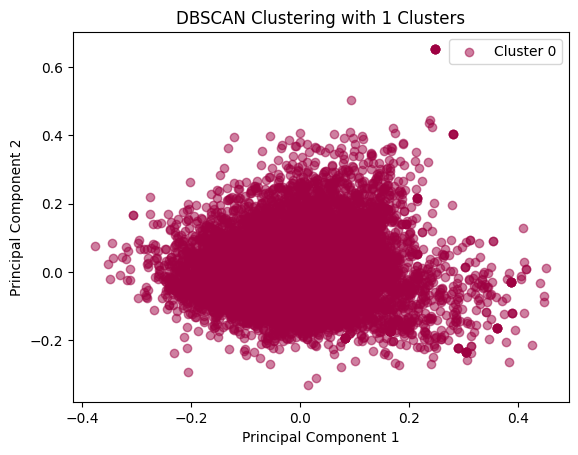

DBSCAN 클러스터링 결과: [0 0 0 ... 0 0 0]


In [117]:
dbscan_labels = perform_text_dbscan_clustering(sample_df['preprocessing_comments'].values, 1000)
print("DBSCAN 클러스터링 결과:", dbscan_labels)

In [7]:
from sklearn.cluster import DBSCAN
import numpy as np

vector = np.array(vector) # Normalizer를 이용해 변환된 벡터
model = DBSCAN(eps=0.3,min_samples=6, metric = "cosine")
# 거리 계산 식으로는 Cosine distance를 이용
result = model.fit_predict(vector)

In [8]:
sample['label'] = result
sample

<ipython-input-8-e90fa3d2b260>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample['label'] = result


,airbnb_id,host_id,reviewer_id,region,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,comments,preprocessing_comments,noun,sent_score,label
0,10459659,53118015.0,229151394.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트는 시부야 중심부와 매우 가깝기 때문에 밤문화와 레스토랑에 ...,히로타카스 시부야 아파트 시부야 중심부 가깝다 때문 밤문화 레스토랑 접근 편리 이자...,0.114286,-1
1,10459659,53118015.0,202132931.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야에 머물기 좋은 숙소 모든 것의 한가운데에 히로가 항상 근처에 있었고 도움이 ...,시부야 머물다 숙소 가운데 히로 근처 도움 필요 도와주다 객실 라벨 지정 편의 시설...,0.173913,-1
2,10459659,53118015.0,207696728.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,아주 만족했습니다 위치도 너무 좋고 시설도 깨끗했습니다 무엇보다 욕실이 아주 좋았습니다,만족 위치 시설 무엇 욕실,0.400000,-1
3,10459659,53118015.0,494572862.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,"방의 위치는 완벽합니다. 모든 것, 특히 기차역까지 도보로 갈 수 있는 거리에 있습...",방의 위치는 완벽합니다 모든 것 특히 기차역까지 도보로 갈 수 있는 거리에 있습니다...,위치 완벽 기차역 도보 거리 기차역 방법 대하다 지침 도착 들어가다 적극 추천 숙박 감사,0.200000,-1
4,10459659,53118015.0,211853953.0,Shibuya Ku,3.0,Private Bathroom,Unknown,3.0,"$12,000.00",2.0,숙소가 넓고 위치가 매우 편리합니다. 아래층에 체크아웃 후 짐을 보관할 수 있는 l...,숙소가 넓고 위치가 매우 편리합니다 아래층에 체크아웃 후 짐을 보관할 수 있는 이 ...,숙소 위치 편리 아래층 체크 아웃 보관 다음 감사,0.444444,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10583516,54600515.0,65007965.0,Setagaya Ku,3.0,Private Bathroom,1.0,Unknown,"$9,429.00",3.0,아이린의 집은 매우 깨끗하고 시설이 잘 갖춰져 있으며 그녀는 매우 친절합니다. 우리...,아이린의 집은 매우 깨끗하고 시설이 잘 갖춰져 있으며 그녀는 매우 친절합니다 우리는...,아이린 시설 갖추다 그녀 친절 우리 저녁 이후 도착 그녀 우리 데리다 그녀 우리 질...,0.103448,-1
996,10583516,54600515.0,60013734.0,Setagaya Ku,3.0,Private Bathroom,1.0,Unknown,"$9,429.00",3.0,에어린 직원분들 정말 친절하십니다 예약하는 순간부터 질문에 너무 친절하게 답변해 주...,에어린 직원분들 정말 친절하십니다 예약하는 순간부터 질문에 너무 친절하게 답변해 주...,어리다 직원 친절 예약 순간 질문 친절 답변 정보 확인 여행 문제 해결 이르다 아침...,0.212500,-1
997,10583516,54600515.0,70501543.0,Setagaya Ku,3.0,Private Bathroom,1.0,Unknown,"$9,429.00",3.0,멋지고 깨끗한 아파트 아린은 훌륭하고 도움이 됩니다. 숙소는 조용하고 조용합니다. ...,멋지고 깨끗한 아파트 아린은 훌륭하고 도움이 됩니다 숙소는 조용하고 조용합니다 몇 ...,멋지다 아파트 도움 숙소 시내 중심가 도착 도쿄 러시 즐기다 지하철역 가깝다 거리 ...,0.437500,-1
998,10583516,54600515.0,65652125.0,Setagaya Ku,3.0,Private Bathroom,1.0,Unknown,"$9,429.00",3.0,에어비앤비를 이용한 것은 이번이 세 번째이며 지금까지 Airin은 제가 경험한 최고...,에어비앤비를 이용한 것은 이번이 세 번째이며 지금까지 은 제가 경험한 최고의 호스트...,에어비앤비 이용 이번 지금 경험 최고 호스트 그녀 다정 도움 연락 기차역 우리 데리...,0.160494,-1


In [12]:
sample['label'].value_counts()

-1    994
 0      6
Name: label, dtype: int64

### LDA

In [42]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt



In [15]:
def compute_evaluation_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    perplexity_values=[]
    model_list = []
    for num_topics in range(start, limit+1, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_values.append(model.log_perplexity(corpus))
    return model_list, coherence_values, perplexity_values

In [16]:
def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 20
    start = 2
    step=1

    model_list, coherence_values, perplexity_values = compute_evaluation_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = list(range(start, limit+1))
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.title("Coherence Scores")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    plt.plot(x, perplexity_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Perplexity score")
    plt.title("Perplexity Scores")
    plt.legend(("Perplexity_values"), loc='best')
    plt.show()

In [48]:
tokens = sample['token'].values
id2word = corpora.Dictionary(tokens)
id2word.filter_extremes(no_below=2, no_above=0.5)
corpus = [id2word.doc2bow(text) for text in tokens]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gensim/topic_coherence/text_analysis.py:442: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn("stats accumulation interrupted; <= %d documents processed", self._num_docs)


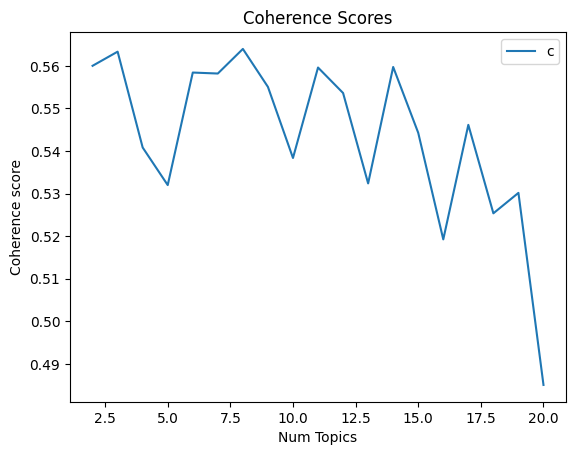

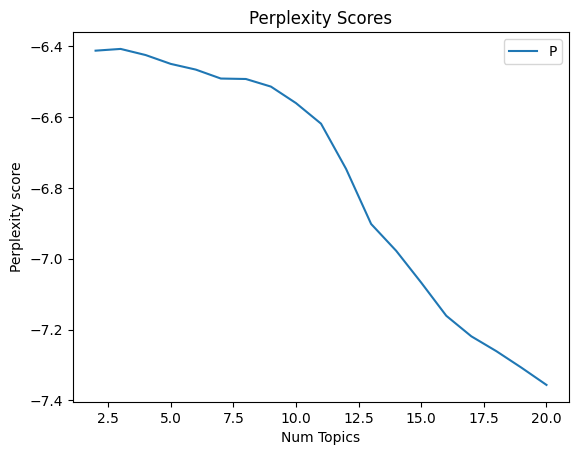

In [40]:
find_optimal_number_of_topics(dictionary=id2word, corpus=corpus, processed_data=tokens)

- num_topics: 생성될 토픽의 개수
- chunksize: 한번의 트레이닝에 처리될 문서의 개수
- passes: 전체 코퍼스 트레이닝 횟수
- interations: 문서 당 반복 횟수

In [49]:
num_topics = 7
chunksize = 2000
passes = 20
iterations = 400
eval_every = None

temp = id2word[0]
id2token = id2word.id2token

model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)



In [44]:
topics = model.print_topics(num_words=20)

topic_keywords = list()
for topic in topics:
    topic_num, keywords = topic
    topic_row = [topic_num+1]
    for keyword in keywords.split('+'):
        score, kw = keyword.split('*')
        kw = kw.replace('"', '').strip()
        topic_row.append(kw)
    topic_keywords.append(topic_row)
    print(topic)

(0, '0.062*"우리" + 0.021*"도착" + 0.016*"공항" + 0.014*"호스트" + 0.011*"친절" + 0.011*"데리다" + 0.009*"위하다" + 0.009*"아침" + 0.009*"거리" + 0.009*"지하철" + 0.009*"아사쿠사" + 0.008*"시간" + 0.008*"아이" + 0.008*"여행" + 0.008*"근처" + 0.007*"버스" + 0.007*"나리타" + 0.007*"정도" + 0.007*"그녀" + 0.006*"도보"')
(1, '0.018*"침대" + 0.017*"욕실" + 0.014*"주방" + 0.014*"때문" + 0.012*"공간" + 0.012*"문제" + 0.011*"사용" + 0.010*"체크인" + 0.009*"화장실" + 0.009*"괜찮다" + 0.009*"계단" + 0.008*"엘리베이터" + 0.008*"세탁기" + 0.008*"침실" + 0.008*"어렵다" + 0.008*"숙소" + 0.007*"유일" + 0.007*"사람" + 0.007*"일본" + 0.006*"에어컨"')
(2, '0.051*"숙소" + 0.048*"호스트" + 0.036*"보내다" + 0.035*"감사" + 0.035*"친절" + 0.034*"시간" + 0.031*"즐겁다" + 0.028*"편안" + 0.027*"추천" + 0.027*"위치" + 0.019*"응답" + 0.019*"도움" + 0.016*"머물다" + 0.015*"빠르다" + 0.013*"드리다" + 0.013*"우리" + 0.013*"숙박" + 0.012*"경험" + 0.012*"여행" + 0.012*"도쿄"')
(3, '0.098*"편리" + 0.032*"교통" + 0.028*"근처" + 0.025*"주인" + 0.023*"다음" + 0.022*"집주인" + 0.020*"위치" + 0.018*"선택" + 0.018*"가깝다" + 0.017*"편의점" + 0.017*"갖추다" + 0.017*"시설" + 0.016*"슈퍼마켓" + 0.0

In [51]:
!pip install pandas==1.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.0
    Uninstalling pandas-2.1.0:
      Successfully uninstalled pandas-2.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipykernel==5.5.6, but you have ipykernel 6.25.2 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 1.5.1 which is incompatible.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.1 which is incompatible.


In [52]:
import pickle
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

In [53]:
lda_visualization = gensimvis.prepare(model, corpus, id2word, sort_topics=False)
pyLDAvis.save_html(lda_visualization, 'visualize_lda.html')

In [54]:
pyLDAvis.display(lda_visualization)